In [34]:
from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from fbprophet import Prophet

%matplotlib inline
plt.rcParams['figure.figsize']= (8,8)

from warnings import filterwarnings
filterwarnings('ignore')

In [35]:
train_features = pd.read_csv('./data/dengue_features_train.csv', index_col=[0,1,2])
train_labels = pd.read_csv('./data/dengue_labels_train.csv', index_col=[0,1,2])


In [36]:
def preprocess_data(train_features, train_labels=None):
    df = train_features.copy()
    
    features = ['station_max_temp_c', 
                 'station_min_temp_c', 
                 'station_avg_temp_c', 
                 'precipitation_amt_mm', 
                 'reanalysis_dew_point_temp_k', 
                 'reanalysis_air_temp_k', 
                 'reanalysis_relative_humidity_percent',
                 'reanalysis_precip_amt_kg_per_m2', 
                 'ndvi_se', 
                 'ndvi_ne', 
                 'station_precip_mm', 
                 'week_start_date']
    
    df = df[features]
    df.fillna(method='ffill', inplace=True)

    
    if train_labels is not None:
        labels = train_labels
        df = df.join(labels)
        
   
    celsius_list = ['station_max_temp_c', 'station_min_temp_c', 'station_avg_temp_c' ]
    for col in celsius_list:
        df[col] = df[col] + 273.15
    df = df.rename(columns = { name : name[:-2] + '_k' for name in celsius_list })
    
    sj = df.loc['sj']
    iq = df.loc['iq']
    
    return sj, iq

In [37]:
sj_train, iq_train = preprocess_data(train_features, train_labels)

sj_train_subtrain = sj_train.head(800)
sj_train_subtest = sj_train.tail(sj_train.shape[0] - 800)

iq_train_subtrain = iq_train.head(400)
iq_train_subtest = iq_train.tail(iq_train.shape[0] - 400)

In [41]:
train_data = sj_train[['week_start_date', 'total_cases']]
train_data.columns = ['ds', 'y']

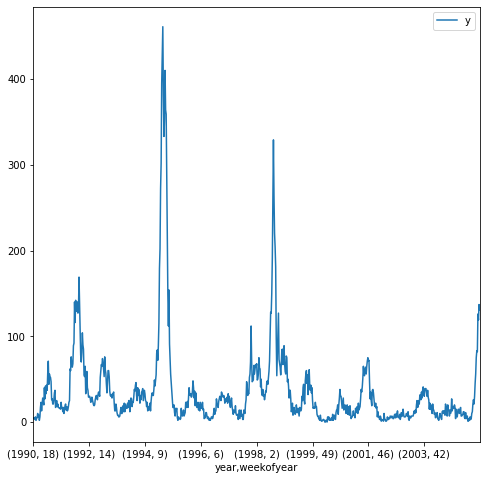

In [33]:
train_data.plot()

In [42]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [43]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [48]:
# load the dataset
dataQue = pandas.read_csv('airline-passengers.csv')
dataframe = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = train_data.drop(columns=["ds"]).values
dataset = dataset.astype('float32')

In [49]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [50]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

627 309


In [51]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [52]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [53]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [54]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 3s - loss: 0.0132
Epoch 2/100
 - 2s - loss: 0.0092
Epoch 3/100
 - 2s - loss: 0.0055
Epoch 4/100
 - 2s - loss: 0.0026
Epoch 5/100
 - 2s - loss: 0.0014
Epoch 6/100
 - 2s - loss: 0.0012
Epoch 7/100
 - 2s - loss: 0.0012
Epoch 8/100
 - 2s - loss: 0.0011
Epoch 9/100
 - 2s - loss: 0.0012
Epoch 10/100
 - 2s - loss: 0.0012
Epoch 11/100
 - 2s - loss: 0.0011
Epoch 12/100
 - 2s - loss: 0.0012
Epoch 13/100
 - 2s - loss: 0.0012
Epoch 14/100
 - 2s - loss: 0.0011
Epoch 15/100
 - 2s - loss: 0.0011
Epoch 16/100
 - 2s - loss: 0.0011
Epoch 17/100
 - 2s - loss: 0.0011
Epoch 18/100
 - 2s - loss: 0.0012
Epoch 19/100
 - 2s - loss: 0.0011
Epoch 20/100
 - 2s - loss: 0.0011
Epoch 21/100
 - 2s - loss: 0.0011
Epoch 22/100
 - 2s - loss: 0.0011
Epoch 23/100
 - 2s - loss: 0.0012
Epoch 24/100
 - 2s - loss: 0.0011
Epoch 25/100
 - 2s - loss: 0.0011
Epoch 26/100
 - 2s - loss: 0.0012
Epoch 27/100
 - 2s - loss: 0.0011
Epoch 28/100
 - 2s - loss: 0.0011
Epoch 29/100
 - 2s - loss: 0.0011
Epoch 30/100
 - 2s - lo

In [55]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 15.21 RMSE
Test Score: 9.42 RMSE


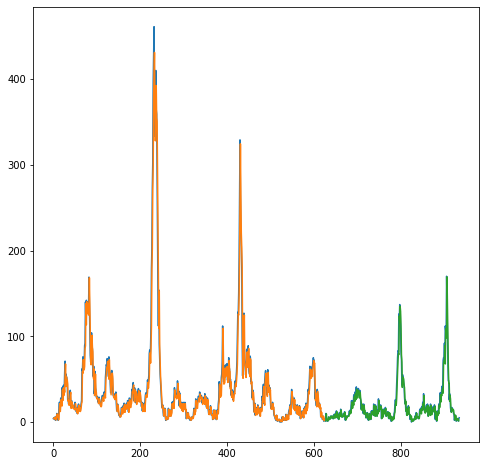

In [56]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()